In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from geopandas.tools import sjoin

In [47]:

# vectorized haversine function
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

### SE USA

In [3]:
# dfSEUS = pd.read_csv('../../../analysis/SEusa/model_data_out/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-05-18_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-08-31_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')
# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-9-4_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat.csv')

In [4]:

# dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-9-7_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat-by-gs.csv')

In [48]:
dfSEUS = pd.read_csv('../model_data/ML_slope_wave_atlantic_2022-9-20_Data_Post2012_VerifiedOnshore_0.0015_right_transects_model_stratsample-by-lat-by-gs.csv')

In [49]:
len(dfSEUS)

400

In [50]:
dfSEUS['d50'].max()

1.398605927

In [51]:
dfSEUS['d50'].min()

0.090577125

In [52]:
# df_strat_gs = dfSEUS.copy()

# num_cats=11
# num_samples_per_category = 30

# df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
# df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

# len(df_strat_gs)

In [53]:
# df_strat_gs['category']

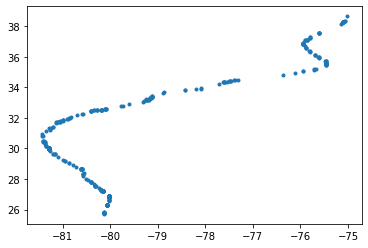

In [54]:
plt.plot(dfSEUS['longitude'], dfSEUS['latitude'], '.')
# plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [55]:
# dfSEUS = df_strat_gs.copy()
# len(dfSEUS)

In [56]:
dfSEUS['code'] = np.ones(len(dfSEUS))

In [57]:
dfSEUS = dfSEUS[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code', 'dataset',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [58]:
dfSEUS.to_csv('../model_data/dataset_SE_US_coast_strat_gs.csv')

In [59]:
rand = np.random.randn(len(dfSEUS))
np.save('../model_out/SEUS_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_rand.npy', allow_pickle=True)


In [60]:
(dfSEUS['d50'].min(), dfSEUS['d50'].max())

(0.090577125, 1.398605927)

In [61]:
(dfSEUS['latitude'].min(), dfSEUS['latitude'].max())

(25.71356689568584, 38.661087088849946)

In [62]:
(dfSEUS['longitude'].min(), dfSEUS['longitude'].max())

(-81.4288597633003, -75.03189662141307)

In [63]:
# dist = haversine(
#     dfSEUS['latitude'].min(), dfSEUS['longitude'].min(), dfSEUS['latitude'].max(), dfSEUS['longitude'].max(), 
#     to_radians=True, earth_radius=6371)

# ##km
# print(dist)

In [64]:
tmp = dfSEUS[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

1871.3475028752084

In [65]:
len(dfSEUS)*.6

240.0

In [66]:
len(dfSEUS)*.4

160.0

### E Australia

In [67]:
dataset = '../../../orig_data/australia/dataset_Australia_East_coast.geojson'

dfOz = gpd.read_file(dataset)

# dfOz = dfOz[dfOz['d50']<=.9] #2
len(dfOz)

sources = ['Short (2022)' for k in dfOz['d50']]


In [68]:
len(dfOz)

279

In [69]:
dfOz['dataset'] = sources

In [70]:
dfOz.head()

,beach_id,beach_slope_average,width_ci_average,quality_flag,mstr,hsig_median,prc_mstr_obs,min_tide_obs,max_tide_obs,sl_points_average,...,distance_to_sample,latitude,longitude,Hs_mean,Hs_max,Tp_mean,Wdir_mean,Wdir_weighted_mean,geometry,dataset
0,aus0011,0.060145,0.0161,High,2.068996,0.708,90.97,-0.697446,1.184659,673.0,...,0.000000,-25.854332,153.078347,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.07112 -25.81160, 153.07118 -25...",Short (2022)
1,aus0012,0.082709,0.0335,Medium,2.068996,0.616,92.14,-0.721615,1.184659,402.0,...,8.371863,-25.932753,153.134103,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.08974 -25.89640, 153.08979 -25...",Short (2022)
2,aus0013,0.060027,0.0164,High,2.058574,1.294,88.94,-0.652368,1.178532,369.0,...,57.922081,-26.008686,153.153149,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.18804 -25.93697, 153.18795 -25...",Short (2022)
3,aus0014,0.054012,0.0139,High,2.050147,1.172,88.16,-0.650809,1.156622,394.0,...,61.914900,-26.157750,153.097286,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.12230 -26.08255, 153.12227 -26...",Short (2022)
4,aus0015,0.049932,0.0087,High,2.045488,1.152,89.20,-0.650148,1.174339,425.0,...,27.051000,-26.311676,153.068419,1.565813,4.754424,8.719285,112.555036,117.47011,"LINESTRING (153.07537 -26.23401, 153.07535 -26...",Short (2022)


In [71]:

ind = np.where(dfOz['quality_flag']!='Low')[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

ind = np.where(dfOz['distance_to_sample']<1000)[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

dfOz = dfOz.dropna()
# df.head()
len(dfOz)

dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)
dfOz.to_csv('../model_data/dataset_Australia_East_coast_nostrat.csv')

In [72]:
df_strat_gs = dfOz.copy()

num_cats=6
num_samples_per_category = 40

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

240

In [73]:
df_strat_gs['category']

0      (0.118, 0.258]
1      (0.118, 0.258]
2      (0.118, 0.258]
3      (0.118, 0.258]
4      (0.118, 0.258]
            ...      
235    (0.814, 0.953]
236    (0.814, 0.953]
237    (0.814, 0.953]
238    (0.814, 0.953]
239    (0.814, 0.953]
Name: category, Length: 240, dtype: category
Categories (6, interval[float64, right]): [(0.118, 0.258] < (0.258, 0.397] < (0.397, 0.536] < (0.536, 0.675] < (0.675, 0.814] < (0.814, 0.953]]

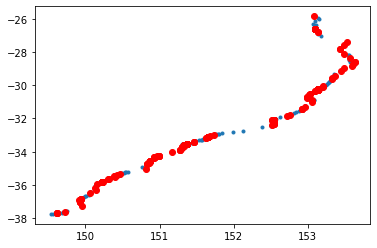

In [74]:
plt.plot(dfOz['longitude'], dfOz['latitude'], '.')
plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [75]:
dfEAus = df_strat_gs.copy()
len(dfEAus)

240

In [76]:
dfEAus['code'] = np.zeros(len(dfEAus))

In [77]:
dfEAus = dfEAus[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code', 'dataset',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [78]:
dfEAus.to_csv('../model_data/dataset_E_Aus_coast_strat_gs.csv')

In [79]:
rand = np.random.randn(len(dfEAus))
np.save('../model_out/EAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/EAus_rand.npy', allow_pickle=True)


In [80]:
(dfEAus['d50'].min(), dfEAus['d50'].max())

(0.1575, 0.95264)

In [81]:
(dfEAus['latitude'].min(), dfEAus['latitude'].max())

(-37.69923501259355, -25.854331607418633)

In [82]:
(dfEAus['longitude'].min(), dfEAus['longitude'].max())

(149.62115079211821, 153.63715067058754)

In [83]:
# dist = haversine(
#     dfEAus['latitude'].min(), dfEAus['longitude'].min(), dfEAus['latitude'].max(), dfEAus['longitude'].max(), 
#     to_radians=True, earth_radius=6371)

# ##km
# print(dist)

In [84]:
tmp = dfEAus[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

1440.6832136954004

In [85]:
len(dfEAus)*.6

144.0

In [86]:
len(dfEAus)*.4

96.0

### merge 2 regions

In [87]:
df = pd.concat([dfSEUS, dfEAus], ignore_index=True)
df = df.dropna()
len(df)

640

In [88]:
df.to_csv('../model_data/dataset_SEUS_EAus_strat-by-gs.csv')

In [89]:
rand = np.random.randn(len(df))
np.save('../model_out/SEUS_EOz_rand.npy', rand, allow_pickle=True)


### S Cali

In [90]:
dfSCali = pd.read_csv('../../../orig_data/US_S_CA/SoCal_GrainSize_waves_slopes_tide_merged.csv')
dfSCali = dfSCali[dfSCali['Grain_Size']<2] 
dfSCali = dfSCali[dfSCali['Grain_Size']>.064] 

In [91]:
np.unique(dfSCali['Ele'])

array(['BB', 'BF', 'MB', 'O'], dtype=object)

In [92]:
dfSCali = dfSCali[(dfSCali['Ele']=='BF') | (dfSCali['Ele']=='MB')]
dfSCali = dfSCali.dropna()

In [93]:
len(dfSCali)

971

In [94]:
df_strat_gs = dfSCali.copy()

num_cats=11
num_samples_per_category = 25

df_strat_gs['category'] = pd.cut(df_strat_gs['Grain_Size'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

275

In [95]:
df_strat_gs.keys()

Index(['Unnamed: 0', 'Ele', 'dataset', 'Grain_Size', 'Hs', 'Tp', 'Ta', 'Dp',
       'Da', 'Ea', 'Es', 'geometry', 'Lon', 'Lat', 'Beach face slope',
       'index_right', 'MEAN_SIG_WAVEHEIGHT', 'TIDAL_RANGE', 'ERODIBILITY',
       'CHLOROPHYLL', 'TURBIDITY', 'REGIONAL_SINUOSITY',
       'OUTFLOW_DENSITY_RESCALED', 'category'],
      dtype='object')

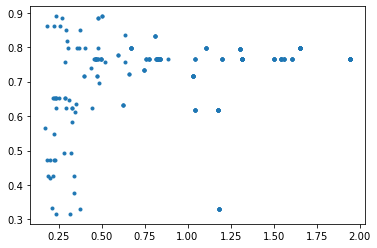

In [96]:
plt.plot(df_strat_gs['Grain_Size'], df_strat_gs['Hs'],'.')
# plt.plot(df_strat_gs['Grain_Size'], df_strat_gs['MEAN_SIG_WAVEHEIGHT'],'r.')

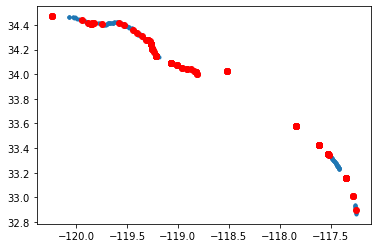

In [97]:
plt.plot(dfSCali['Lon'], dfSCali['Lat'], '.')
plt.plot(df_strat_gs['Lon'], df_strat_gs['Lat'], 'ro')

In [98]:
dfSCali = df_strat_gs.copy()
len(dfSCali)

275

In [99]:
dfSCali.rename(
    columns = {'Beach face slope':'beach_slope_average', 
               'Grain_Size':'d50', 
               'Hs':'hs_mean', 
               'Tp': 'tp', 
               'Dp':'dir', 
               'Lat':'latitude', 
               'Lon':'longitude', 
               'TIDAL_RANGE':'mstr'}, 
    inplace = True)


In [100]:
dfSCali['code'] = np.ones(len(dfSCali))*2

In [101]:
dfSCali = dfSCali[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code','dataset',
       'hs_mean', 'dir', 'tp']]
dfSCali.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [102]:
dfSCali.head()

,latitude,longitude,d50,beach_slope_average,mstr,code,dataset,hs_mean,dir,tp
0,33.576053,-117.840340,0.252518,0.070,2.485209,2.0,SC_Beach,0.653808,221.567094,12.969022
1,33.576053,-117.840340,0.236409,0.070,2.485209,2.0,SC_Beach,0.653808,221.567094,12.969022
2,34.437216,-119.942570,0.222100,0.190,2.453082,2.0,Barnard_Santa_Barbara,0.547990,217.688663,13.174852
3,33.576053,-117.840340,0.236409,0.070,2.485209,2.0,SC_Beach,0.653808,221.567094,12.969022
4,34.470247,-120.239018,0.230123,0.125,2.443020,2.0,SC_Beach,0.471879,190.163111,13.503772


In [103]:
dfSCali.to_csv('../model_data/dataset_S_CA_coast_strat_gs.csv')

In [104]:
rand = np.random.randn(len(dfSCali))
np.save('../model_out/SCA_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SCA_rand.npy', allow_pickle=True)


In [105]:
(dfSCali['d50'].min(), dfSCali['d50'].max())

(0.1738, 1.942912168)

In [106]:
(dfSCali['latitude'].min(), dfSCali['latitude'].max())

(32.89431182298577, 34.47024690057668)

In [107]:
(dfSCali['longitude'].min(), dfSCali['longitude'].max())

(-120.23901844387711, -117.25184349464496)

In [108]:
# dist = haversine(
#     dfSCali['latitude'].min(), dfSCali['longitude'].min(), dfSCali['latitude'].max(), dfSCali['longitude'].max(), 
#     to_radians=True, earth_radius=6371)

# ##km
# print(dist)

In [109]:
tmp = dfSCali[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

463.2559465517879

In [110]:
len(dfSCali)*.6

165.0

In [111]:
len(dfSCali)*.4

110.0

### merge 3 regions

In [112]:
df = pd.concat([dfSEUS, dfEAus, dfSCali], ignore_index=True)
df = df.dropna()
len(df)

915

In [113]:
print(np.sum(df.code==0))
print(np.sum(df.code==1))
print(np.sum(df.code==2))

240
400
275


In [114]:
df.to_csv('../model_data/dataset_SEUS_EAus_SCA_strat-by-gs.csv')

In [115]:
rand = np.random.randn(len(df))
np.save('../model_out/SEUS_EOz_SCA_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_EOz_SCA_rand.npy', allow_pickle=True)


### whole Aus

In [54]:
dataset = '../../../orig_data/australia/dataset_Australia_all.geojson'

dfOz = gpd.read_file(dataset)

dfOz = dfOz[dfOz['d50']<=1] #2
len(dfOz)

ind = np.where(dfOz['quality_flag']!='Low')[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)


ind = np.where(dfOz['distance_to_sample']<1000)[0]
len(ind)
dfOz = dfOz.iloc[ind]
len(dfOz)

dfOz = dfOz.dropna()
len(dfOz)

dfOz.rename(columns = {'Hs_max':'hs_max', 'Hs_mean':'hs_mean', 'Tp_mean': 'tp', 'Wdir_mean':'dir'}, inplace = True)

In [55]:
dfOz.to_csv('../model_data/dataset_whole_Aus_coast_no_strat.csv')

In [56]:

df_strat_gs = dfOz.copy()

num_cats=10
num_samples_per_category = 30

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

300

In [57]:
df_strat_gs['category']

0      (0.0907, 0.182]
1      (0.0907, 0.182]
2      (0.0907, 0.182]
3      (0.0907, 0.182]
4      (0.0907, 0.182]
            ...       
295     (0.903, 0.993]
296     (0.903, 0.993]
297     (0.903, 0.993]
298     (0.903, 0.993]
299     (0.903, 0.993]
Name: category, Length: 300, dtype: category
Categories (10, interval[float64, right]): [(0.0907, 0.182] < (0.182, 0.272] < (0.272, 0.362] < (0.362, 0.452] ... (0.633, 0.723] < (0.723, 0.813] < (0.813, 0.903] < (0.903, 0.993]]

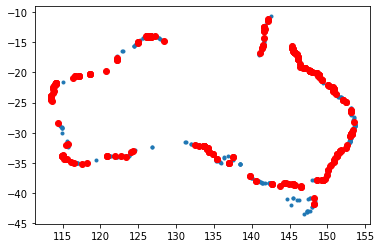

In [58]:
plt.plot(dfOz['longitude'], dfOz['latitude'], '.')
plt.plot(df_strat_gs['longitude'], df_strat_gs['latitude'], 'ro')

In [59]:
dfOz = df_strat_gs.copy()
len(dfOz)

300

In [60]:
dfOz['code'] = np.ones(len(dfOz))*3

In [61]:
dfOz = dfOz[['latitude', 'longitude', 'd50',
        'beach_slope_average', 'mstr', 'code',
         'hs_mean', 'dir', 'tp']].copy() #'hs_max',

In [62]:
dfOz.to_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')


In [63]:
rand = np.random.randn(len(dfOz))
np.save('../model_out/WholeAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/WholeAus_rand.npy', allow_pickle=True)


In [64]:
(dfOz['latitude'].min(), dfOz['latitude'].max())

(-41.86306503417177, -11.177154253487608)

In [65]:
(dfOz['longitude'].min(), dfOz['longitude'].max())

(113.40341054926732, 153.55231666293452)

In [66]:
(dfOz['d50'].min(), dfOz['d50'].max())

(0.09841, 0.99309)

In [115]:
tmp = dfOz[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

176702.44451208203

In [164]:
len(dfOz)*.6

180.0

In [165]:
len(dfOz)*.4

120.0

### Aus regions

In [83]:
dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_no_strat.csv')

sources = ['Short (2022)' for k in dfOz['d50']]
dfOz['dataset'] = sources

dfOz = gpd.GeoDataFrame(
    dfOz, geometry=gpd.points_from_xy(dfOz.longitude, dfOz.latitude))

regions = '../../../orig_data/australia/sediment_compartments/Regions.geojson'
Oz_regions = gpd.read_file(regions)
Oz_regions.keys()

Index(['ID_Region', 'Descriptio', 'geometry'], dtype='object')

In [84]:

sources = ['Short (2022)' for k in Oz_regions['geometry']]
Oz_regions['dataset'] = sources


dfOzregions = sjoin(dfOz, Oz_regions, how='left')

/tmp/ipykernel_89930/3128003552.py:5: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4283

  dfOzregions = sjoin(dfOz, Oz_regions, how='left')


In [85]:
dfOzregions.keys()

Index(['Unnamed: 0', 'beach_id', 'beach_slope_average', 'width_ci_average',
       'quality_flag', 'mstr', 'hsig_median', 'prc_mstr_obs', 'min_tide_obs',
       'max_tide_obs', 'sl_points_average', 'beach_length', 'coastal_region',
       'primary_comp_id', 'secondary_comp_id', 'd50', 'distance_to_sample',
       'latitude', 'longitude', 'hs_mean', 'hs_max', 'tp', 'dir',
       'Wdir_weighted_mean', 'geometry', 'dataset_left', 'index_right',
       'ID_Region', 'Descriptio', 'dataset_right'],
      dtype='object')

In [86]:
dfOzNE = dfOzregions[dfOzregions['ID_Region']==1]
print(len(dfOzNE))

dfOzSE = dfOzregions[dfOzregions['ID_Region']==2]
print(len(dfOzSE))

dfOzS = dfOzregions[dfOzregions['ID_Region']==3]
print(len(dfOzS))

dfOzW = dfOzregions[dfOzregions['ID_Region']==4]
print(len(dfOzW))

dfOzNW = dfOzregions[dfOzregions['ID_Region']==5]
print(len(dfOzNW))

dfOzCG = dfOzregions[dfOzregions['ID_Region']==6] #Carpentaria Gulf
print(len(dfOzCG))

163
289
179
60
69
49


In [87]:
dfOzCG.to_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_nostrat.csv')
dfOzW.to_csv('../model_data/dataset_Australia_W_coast_nostrat.csv')
dfOzNW.to_csv('../model_data/dataset_Australia_NW_coast_nostrat.csv')
dfOzNE.to_csv('../model_data/dataset_Australia_NE_coast_nostrat.csv')
dfOzSE.to_csv('../model_data/dataset_Australia_SE_coast_nostrat.csv')
dfOzS.to_csv('../model_data/dataset_Australia_S_coast_nostrat.csv')

In [88]:
dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')

dfOz = gpd.GeoDataFrame(
    dfOz, geometry=gpd.points_from_xy(dfOz.longitude, dfOz.latitude))

dfOzregions = sjoin(dfOz, Oz_regions, how='left')

/tmp/ipykernel_89930/1029102663.py:6: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4283

  dfOzregions = sjoin(dfOz, Oz_regions, how='left')


In [90]:
dfOzregions

,Unnamed: 0,latitude,longitude,d50,beach_slope_average,mstr,code,hs_mean,dir,tp,geometry,index_right,ID_Region,Descriptio,dataset
0,0,-23.423046,150.825346,0.13793,0.036926,5.216923,3.0,0.562949,100.042931,4.162319,POINT (150.82535 -23.42305),2,1,North-eastern Coasts,Short (2022)
1,1,-27.424553,153.524568,0.18175,0.051646,1.988240,3.0,1.139328,105.533842,8.728910,POINT (153.52457 -27.42455),3,2,South-eastern Coasts,Short (2022)
2,2,-33.936848,122.542901,0.15713,0.048435,1.122778,3.0,1.740452,196.282278,10.857908,POINT (122.54290 -33.93685),5,3,Southern Coasts,Short (2022)
3,3,-29.309966,153.351347,0.17230,0.051432,1.941419,3.0,1.585693,117.720732,9.064267,POINT (153.35135 -29.30997),3,2,South-eastern Coasts,Short (2022)
4,4,-34.119730,136.354088,0.14968,0.044569,1.901869,3.0,0.801195,185.196228,9.867062,POINT (136.35409 -34.11973),5,3,Southern Coasts,Short (2022)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,-20.170140,148.587043,0.95926,0.124872,3.248942,3.0,0.682425,105.905946,3.926487,POINT (148.58704 -20.17014),2,1,North-eastern Coasts,Short (2022)
296,296,-26.597765,153.100290,0.95264,0.060769,2.036081,3.0,1.498618,108.674345,8.532283,POINT (153.10029 -26.59777),3,2,South-eastern Coasts,Short (2022)
297,297,-32.150506,133.685987,0.93303,0.049206,1.922418,3.0,2.043705,213.374532,12.697816,POINT (133.68599 -32.15051),5,3,Southern Coasts,Short (2022)
298,298,-26.597765,153.100290,0.95264,0.060769,2.036081,3.0,1.498618,108.674345,8.532283,POINT (153.10029 -26.59777),3,2,South-eastern Coasts,Short (2022)


In [102]:
dfOzNE = dfOzregions[dfOzregions['ID_Region']==1]
print(len(dfOzNE))

dfOzSE = dfOzregions[dfOzregions['ID_Region']==2]
print(len(dfOzSE))

dfOzS = dfOzregions[dfOzregions['ID_Region']==3]
print(len(dfOzS))

dfOzW = dfOzregions[dfOzregions['ID_Region']==4]
print(len(dfOzW))

dfOzNW = dfOzregions[dfOzregions['ID_Region']==5]
print(len(dfOzNW))

dfOzCG = dfOzregions[dfOzregions['ID_Region']==6] #Carpentaria Gulf
print(len(dfOzCG))

90
64
66
29
37
14


In [103]:
dfOzCG.to_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_strat_gs.csv')
dfOzW.to_csv('../model_data/dataset_Australia_W_coast_strat_gs.csv')
dfOzNW.to_csv('../model_data/dataset_Australia_NW_coast_strat_gs.csv')
dfOzNE.to_csv('../model_data/dataset_Australia_NE_coast_strat_gs.csv')
dfOzSE.to_csv('../model_data/dataset_Australia_SE_coast_strat_gs.csv')
dfOzS.to_csv('../model_data/dataset_Australia_S_coast_strat_gs.csv')

### 4 regions

In [104]:
dfOzCG['code'] = np.ones(len(dfOzCG))*3
dfOzCG = dfOzCG[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean', 'dir', 'tp']]
dfOzCG.keys()

/home/marda/anaconda3/envs/cgrasp/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [105]:
dfOzW['code'] = np.ones(len(dfOzW))*4
dfOzW = dfOzW[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean', 'dir', 'tp']]
dfOzW.keys()

/home/marda/anaconda3/envs/cgrasp/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [106]:
dfOzNW['code'] = np.ones(len(dfOzNW))*5
dfOzNW = dfOzNW[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean', 'dir', 'tp']]
dfOzNW.keys()

/home/marda/anaconda3/envs/cgrasp/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [107]:
dfOzNE['code'] = np.ones(len(dfOzNE))*6
dfOzNE = dfOzNE[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean', 'dir', 'tp']]
dfOzNE.keys()

/home/marda/anaconda3/envs/cgrasp/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [108]:
dfOzS['code'] = np.ones(len(dfOzS))*7
dfOzS = dfOzS[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean', 'dir', 'tp']]
dfOzS.keys()

/home/marda/anaconda3/envs/cgrasp/lib/python3.10/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'dir', 'tp'],
      dtype='object')

In [109]:
df = pd.concat([dfSEUS, dfEAus, dfSCali, dfOzCG, dfOzW, dfOzNW, dfOzNE, dfOzS], ignore_index=True)
df = df.dropna()
len(df)

1101

In [110]:
print(np.sum(df.code==0))
print(np.sum(df.code==1))
print(np.sum(df.code==2))
print(np.sum(df.code==3))
print(np.sum(df.code==4))
print(np.sum(df.code==5))
print(np.sum(df.code==6))
print(np.sum(df.code==7))

240
350
275
14
29
37
90
66


In [111]:
df

,latitude,longitude,d50,beach_slope_average,mstr,code,dataset,hs_mean,dir,tp
0,37.233376,-75.796295,0.130000,0.041429,1.734562,1.0,Fenster et al (2016),0.370493,133.301156,7.040951
1,29.647451,-81.196295,0.184418,0.074932,1.824102,1.0,rossi,0.508694,80.823780,8.123483
2,31.407165,-81.259130,0.145598,0.030761,2.536886,1.0,C_Alexander,0.210917,130.436050,6.057700
3,35.083643,-75.947038,0.166356,0.065867,1.362719,1.0,Fenster et al (2016),0.909258,142.984767,7.898359
4,37.235443,-75.796423,0.130000,0.041429,1.734562,1.0,Fenster et al (2016),0.370493,133.301156,7.040951
...,...,...,...,...,...,...,...,...,...,...
1096,-32.717920,134.107453,0.920190,0.055202,1.864342,7.0,Short (2022),1.404420,216.898720,12.325972
1097,-32.150506,133.685987,0.933030,0.049206,1.922418,7.0,Short (2022),2.043705,213.374532,12.697816
1098,-34.072370,137.552352,0.907520,0.029839,1.517689,7.0,Short (2022),0.848547,208.806409,8.462415
1099,-34.072370,137.552352,0.907520,0.029839,1.517689,7.0,Short (2022),0.848547,208.806409,8.462415


In [112]:
df.to_csv('../model_data/dataset_SEUS_EAus_SCA_wholeAus_strat.csv')

In [113]:
rand = np.random.randn(len(df))
np.save('../model_out/SEUS_EOz_SCA_wholeAus_rand.npy', rand, allow_pickle=True)

# rand = np.load('../model_out/SEUS_EOz_SCA_wholeAus_rand.npy', allow_pickle=True)


### Northern Ireland

In [166]:
dfNI = pd.read_csv('../../../orig_data/NorthernIreland/Jackson_NIre.csv')

In [167]:
dfNI.rename(
    columns = {'Intertidal slope':'beach_slope_average', 'D50 (mm)':'d50', 'H0 (mean Hs)':'hs_mean', 'T (mean, s)': 'tp', 'MSTR (m)':'mstr'}, 
    inplace = True)

dfNI['code'] = np.ones(len(dfNI))*8

tmp = ['Jackson et al. (2005)' for k in dfNI['d50']]

dfNI['dataset'] = tmp

dfNI = dfNI[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code','dataset',
       'hs_mean', 'tp']]
dfNI.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'tp'],
      dtype='object')

In [168]:
(dfNI['latitude'].min(), dfNI['latitude'].max())

(54.0626664, 55.2869665)

In [169]:
(dfNI['longitude'].min(), dfNI['longitude'].max())

(-8.443956, -5.468761)

In [170]:
(dfNI['d50'].min(), dfNI['d50'].max())

(0.137, 0.634)

In [171]:
dfNI.to_csv('../model_data/dataset_NI.csv')

In [172]:
rand = np.random.randn(len(dfNI))
np.save('../model_out/NI_rand.npy', rand, allow_pickle=True)


In [173]:
dfNI

,latitude,longitude,d50,beach_slope_average,mstr,code,dataset,hs_mean,tp
0,54.554352,-8.209775,0.140,0.0139,3.3,8.0,Jackson et al. (2005),2.18,6.88
1,54.841990,-8.443956,0.180,0.0218,3.4,8.0,Jackson et al. (2005),2.18,6.88
2,55.152830,-8.155428,0.210,0.0202,3.4,8.0,Jackson et al. (2005),2.18,6.88
3,55.192982,-7.836669,0.140,0.0134,3.4,8.0,Jackson et al. (2005),2.18,6.88
4,55.286966,-7.166544,0.230,0.0446,2.9,8.0,Jackson et al. (2005),2.18,6.88
5,55.149232,-6.911044,0.190,0.0375,1.6,8.0,Jackson et al. (2005),2.18,6.88
6,55.163580,-6.877427,0.157,0.0194,1.6,8.0,Jackson et al. (2005),2.05,6.89
7,55.164820,-6.788414,0.166,0.0214,1.5,8.0,Jackson et al. (2005),2.26,7.11
8,55.182910,-6.718701,0.157,0.0246,1.5,8.0,Jackson et al. (2005),2.26,7.11
9,55.202304,-6.655600,0.186,0.0320,1.5,8.0,Jackson et al. (2005),2.34,7.17


In [174]:
# stratification deosnt really make sense for this dataset, 
# but boosts up to N=100 (from N=24) while almost retaining original unique value distributions

In [175]:
len(np.unique(dfNI['d50'].values))

23

In [176]:
df_strat_gs = dfNI.copy()

num_cats=2
num_samples_per_category = len(dfNI)*2

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

100

In [177]:
len(np.unique(df_strat_gs['d50'].values))

20

In [178]:
unique , unique_counts   = np.unique(df_strat_gs['d50'].values, return_counts=True)

In [179]:
unique

array([0.137, 0.14 , 0.15 , 0.157, 0.166, 0.169, 0.18 , 0.186, 0.19 ,
       0.197, 0.21 , 0.214, 0.218, 0.229, 0.23 , 0.248, 0.28 , 0.286,
       0.397, 0.634])

In [180]:
unique_counts

array([ 1,  6,  2,  3,  2,  4,  3,  5,  1,  1,  1,  5,  1,  2,  2,  4,  4,
        3, 29, 21], dtype=int64)

In [181]:
df_strat_gs.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean', 'tp', 'category'],
      dtype='object')

In [182]:
df_strat_gs = df_strat_gs[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'hs_mean', 'tp']]

In [183]:
df_strat_gs.to_csv('../model_data/dataset_NI_strat_gs.csv')

In [184]:
rand = np.random.randn(len(df_strat_gs))
np.save('../model_out/NI_rand_strat_gs.npy', rand, allow_pickle=True)


In [185]:
tmp = df_strat_gs[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

1215.323278645891

In [186]:
len(df_strat_gs)*.6

60.0

In [187]:
len(df_strat_gs)*.4

40.0

### Massachusetts

In [188]:
dfM = pd.read_csv('../../../orig_data/Massachusetts_Beach_Data/Mass_merged_lowtide.csv')

tmp = ['Woodruff et al. (2021)' for k in dfM['d50']]

dfM['dataset'] = tmp

In [189]:
dfM.keys()

Index(['Unnamed: 0', 'latitude', 'longitude', 'hs_mean', 'mstr', 'd50',
       'beach_slope_average', 'dataset'],
      dtype='object')

In [190]:
dfM['d50'].min()

0.350985915

In [191]:
dfM['d50'].max()

33.89444444

In [192]:
len(np.unique(dfM['d50'].values))

47

In [193]:
df_strat_gs = dfM.copy()

num_cats=2
num_samples_per_category = len(dfM)

df_strat_gs['category'] = pd.cut(df_strat_gs['d50'], num_cats)
df_strat_gs = df_strat_gs.groupby(['category']).apply(lambda x: x.sample(num_samples_per_category, replace = True)).reset_index(drop = True)

len(df_strat_gs)

154

In [194]:
len(np.unique(df_strat_gs['d50'].values))

42

In [195]:
df_strat_gs['d50'].max()

33.89444444

In [196]:
df_strat_gs['d50'].min()

0.350985915

In [197]:
df_strat_gs['code'] = np.ones(len(df_strat_gs))*9

In [198]:
df_strat_gs.keys()

Index(['Unnamed: 0', 'latitude', 'longitude', 'hs_mean', 'mstr', 'd50',
       'beach_slope_average', 'dataset', 'category', 'code'],
      dtype='object')

In [199]:
df_strat_gs = df_strat_gs[['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code', 'dataset',
       'hs_mean']]
df_strat_gs.keys()

Index(['latitude', 'longitude', 'd50', 'beach_slope_average', 'mstr', 'code',
       'dataset', 'hs_mean'],
      dtype='object')

In [200]:
df_strat_gs.to_csv('../model_data/dataset_Mass_strat_gs.csv')

In [201]:
rand = np.random.randn(len(df_strat_gs))
np.save('../model_out/Mass_rand_strat_gs.npy', rand, allow_pickle=True)


In [202]:
df_strat_gs = df_strat_gs[df_strat_gs['d50']<2]

In [203]:
(df_strat_gs['d50'].min(), df_strat_gs['d50'].max())

(0.350985915, 1.370240964)

In [204]:
(df_strat_gs['latitude'].min(), df_strat_gs['latitude'].max())

(41.24014, 41.54233)

In [205]:
(df_strat_gs['longitude'].min(), df_strat_gs['longitude'].max())

(-70.62396, -70.10078)

In [206]:
tmp = df_strat_gs[['latitude','longitude']]

tmp = tmp.sort_values(by='latitude')
# print(tmp)

D=[]
for i in range(len(tmp)-1):
    a = tmp.iloc[i]
    b = tmp.iloc[i+1]
    dist = haversine(
            a['latitude'], a['longitude'], b['latitude'], b['longitude'], 
            to_radians=True, earth_radius=6371)
    D.append(dist)
    
np.sum(D)

58.7083801943504

In [207]:
len(df_strat_gs)*.6

45.0

In [208]:
len(df_strat_gs)*.4

30.0